In [1]:
pip install tweepy

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import requests
import tweepy

import json
import time
import os

import re


import warnings


%matplotlib inline

# Gathering Cells

1.The WeRateDogs Twitter archive. I am giving this file to you, so imagine it as a file on hand. Download this file manually by clicking the following link: twitter_archive_enhanced.csv


2.The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv


3.Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. Note: do not include your Twitter API keys, secrets, and tokens in your project submission.

If you decide to complete your project in the Project Workspace, note that you can upload files to the Jupyter Notebook Workspace by clicking the "Upload" button in the top righthand corner of the dashboard.

In [2]:
os.getcwd()

'C:\\Users\\Zi Ye\\JupyterNB\\Data Wrangling'

### Read The WeRateDogs Twitter archive CSV file 

In [3]:
# Read The WeRateDogs Twitter archive CSV file 
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter_archive.head(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None


### Read the tweet image prediction file

In [4]:
# The tweet image prediction
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_request = requests.get(url, allow_redirects=True)
with open('image-predictions.tsv', mode ='wb') as file:
    file.write(image_request.content)

#Read TSV file
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )
#image_prediction.head()

### Access and store each tweet's retweet count and favorite information to tweet_json

In [5]:
# Each tweet's retweet count and favorite
# Variables that contains the user credentials to access Twitter API 
ACCESS_TOKEN = '363639003-5KzXJIkjSHWSJyO4MHwYbQ1ewCWUFVQD3nqcfLfw'
ACCESS_SECRET = 't2PLJBs3h2d991ZPf02Sfh9atNspBVgMhT18fqlcUiEzz'
CONSUMER_KEY = 'X4UxdABJBTQqS8vsfTRS6NPnW'
CONSUMER_SECRET = 'oKSXAItyBk4jvuT6UOrGbZQRtkjAPVCgyxkLxSs4x3LjNexszl'

# Setup tweepy to authenticate with Twitter credentials:

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

# Create the api to connect to twitter with your creadentials
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser(),wait_on_rate_limit = True,
                 wait_on_rate_limit_notify = True)

In [6]:
tweet_id_list = df_twitter_archive["tweet_id"]
tweet_id_list.head()

0    892420643555336193
1    892177421306343426
2    891815181378084864
3    891689557279858688
4    891327558926688256
Name: tweet_id, dtype: int64

In [7]:
# Get tweet informnation from the archeive

#Start the timer
start = time.time()

#Get the id only
tweets_id_found_list = []
tweet_found = []
#not all ids are found hence this:
tweet_missing = []

for tweet_id in df_twitter_archive["tweet_id"]:
        try:
            tweet = api.get_status(tweet_id)
            tweet_found.append(tweet)
            tweets_id_found_list.append(tweet_id)
            print('saving tweet ID: {} '.format(tweet_id))
        except Exception as e:
            tweet_missing.append(tweet_id)
            print("missing tweet ID: "+ str(tweet_id) + str(e))

# Stop the timer            
end = time.time()


saving tweet ID: 892420643555336193 
saving tweet ID: 892177421306343426 
saving tweet ID: 891815181378084864 
saving tweet ID: 891689557279858688 
saving tweet ID: 891327558926688256 
saving tweet ID: 891087950875897856 
saving tweet ID: 890971913173991426 
saving tweet ID: 890729181411237888 
saving tweet ID: 890609185150312448 
saving tweet ID: 890240255349198849 
saving tweet ID: 890006608113172480 
saving tweet ID: 889880896479866881 
saving tweet ID: 889665388333682689 
saving tweet ID: 889638837579907072 
saving tweet ID: 889531135344209921 
saving tweet ID: 889278841981685760 
saving tweet ID: 888917238123831296 
saving tweet ID: 888804989199671297 
saving tweet ID: 888554962724278272 
missing tweet ID: 888202515573088257[{'code': 144, 'message': 'No status found with that ID.'}]
saving tweet ID: 888078434458587136 
saving tweet ID: 887705289381826560 
saving tweet ID: 887517139158093824 
saving tweet ID: 887473957103951883 
saving tweet ID: 887343217045368832 
saving tweet ID:

Rate limit reached. Sleeping for: 704



saving tweet ID: 758740312047005698 
saving tweet ID: 758474966123810816 
saving tweet ID: 758467244762497024 
saving tweet ID: 758405701903519748 
saving tweet ID: 758355060040593408 
saving tweet ID: 758099635764359168 
saving tweet ID: 758041019896193024 
saving tweet ID: 757741869644341248 
saving tweet ID: 757729163776290825 
saving tweet ID: 757725642876129280 
saving tweet ID: 757611664640446465 
saving tweet ID: 757597904299253760 
saving tweet ID: 757596066325864448 
saving tweet ID: 757400162377592832 
saving tweet ID: 757393109802180609 
saving tweet ID: 757354760399941633 
saving tweet ID: 756998049151549440 
saving tweet ID: 756939218950160384 
saving tweet ID: 756651752796094464 
saving tweet ID: 756526248105566208 
saving tweet ID: 756303284449767430 
saving tweet ID: 756288534030475264 
saving tweet ID: 756275833623502848 
saving tweet ID: 755955933503782912 
saving tweet ID: 755206590534418437 
saving tweet ID: 755110668769038337 
saving tweet ID: 754874841593970688 


Rate limit reached. Sleeping for: 701


saving tweet ID: 676975532580409345 
saving tweet ID: 676957860086095872 
saving tweet ID: 676949632774234114 
saving tweet ID: 676948236477857792 
saving tweet ID: 676946864479084545 
saving tweet ID: 676942428000112642 
saving tweet ID: 676936541936185344 
saving tweet ID: 676916996760600576 
saving tweet ID: 676897532954456065 
saving tweet ID: 676864501615042560 
saving tweet ID: 676821958043033607 
saving tweet ID: 676819651066732545 
saving tweet ID: 676811746707918848 
saving tweet ID: 676776431406465024 
saving tweet ID: 676617503762681856 
saving tweet ID: 676613908052996102 
saving tweet ID: 676606785097199616 
saving tweet ID: 676603393314578432 
saving tweet ID: 676593408224403456 
saving tweet ID: 676590572941893632 
saving tweet ID: 676588346097852417 
saving tweet ID: 676582956622721024 
saving tweet ID: 676575501977128964 
saving tweet ID: 676533798876651520 
saving tweet ID: 676496375194980353 
saving tweet ID: 676470639084101634 
saving tweet ID: 676440007570247681 
s

In [14]:

print("The total number of tweets found" ,len(tweet_found))
print("The total number of tweets missing" , len(tweet_missing))
print('Time is: {}'.format(end-start))
p#rint(end-start)

The total number of tweets found 2331
The total number of tweets missing 25
Time is: 1926.640079498291
1926.640079498291


In [65]:
# Save to tweet_json.txt
tweet_df = pd.DataFrame(tweet_found)
tweet_json=tweet_df[['id', 'favorite_count', 'retweet_count','retweeted']]
tweet_df.head()


# Save the dataFrame in file
tweet_df.to_csv('tweet_json.txt', index=False)

In [18]:
tweet_json.head()

,id,favorite_count,retweet_count,retweeted
0,892420643555336193,35454,7491,False
1,892177421306343426,30690,5558,False
2,891815181378084864,23087,3681,False
3,891689557279858688,38751,7665,False
4,891327558926688256,37027,8267,False


In [64]:
tweet_df.head()

,created_at,id,id_str,text,truncated,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,35454,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,True,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,30690,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,23087,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,38751,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,37027,False,False,False,False,en,NaN,NaN,NaN,NaN


In [21]:
tweet_df.columns

Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities',
       'extended_entities', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'is_quote_status',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'lang',
       'retweeted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status'],
      dtype='object')

# Assessing Data
After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues. Detect and document at least eight (8) quality issues and two (2) tidiness issues in your wrangle_act.ipynb Jupyter Notebook. To meet specifications, the issues that satisfy the Project Motivation (see the Key Points header on the previous page) must be assessed.

### df_twitter_archive

In [37]:
df_twitter_archive.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [23]:
df_twitter_archive.describe

<bound method NDFrame.describe of                 tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000

In [27]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

Identify duplicates and remove:

In [28]:
sum(df_twitter_archive['tweet_id'].duplicated())

0

In [33]:
df_twitter_archive.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [34]:
df_twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [44]:
df_twitter_archive["expanded_urls"].isna().sum()

0       False
1       False
2       False
3       False
4       False
        ...  
2351    False
2352    False
2353    False
2354    False
2355    False
Name: expanded_urls, Length: 2356, dtype: bool

In [38]:
df_twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [39]:
df_twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [40]:
np.sort(df_twitter_archive['rating_numerator'].unique())

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   17,   20,   24,   26,   27,   44,
         45,   50,   60,   75,   80,   84,   88,   99,  121,  143,  144,
        165,  182,  204,  420,  666,  960, 1776], dtype=int64)

In [41]:
np.sort(df_twitter_archive['rating_numerator'].unique())

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   17,   20,   24,   26,   27,   44,
         45,   50,   60,   75,   80,   84,   88,   99,  121,  143,  144,
        165,  182,  204,  420,  666,  960, 1776], dtype=int64)

In [42]:
df_twitter_archive[df_twitter_archive['text'].str.contains(r'(\d+\.\d+\/\d+)')]

C:\Users\Zi Ye\anaconda3\lib\site-packages\pandas\core\strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've been told there's a slight possibility he...,NaN,NaN,NaN,NaN,5,10,None,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,26,10,None,None,None,None,None


In [48]:

# check the context that has decimal numbers in it
with pd.option_context('max_colwidth', 500):
    display(df_twitter_archive[df_twitter_archive['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\Users\Zi Ye\anaconda3\lib\site-packages\pandas\core\strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


#### 1. In the name and the four stages columns, missing data is  'None' instead of 'NaN'
#### 2. Datetime format can be used for retweeted_status_timestamp, timestamp
#### 3: Some tweets did not have images ( and showes NaN values for expanded_urls ).
#### 4: tweet_id and retweeted_status_user_id should ber str object instead of int and float.     
#### 5. There are numbers that doesn't make senses for the denominators and numerators. 
#### 6. There are decimal numbers in the text that  were wrongly interpreted in rating numberators, those need to be changed to correct number mannually.

### image_prediction

In [49]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [50]:
image_prediction.sample()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1038,712065007010385924,https://pbs.twimg.com/media/CeHDV73W0AM5Cf8.jpg,1,goose,0.214301,False,gibbon,0.084253,False,pizza,0.080168,False


In [53]:
# Show an random image
from IPython.display import Image 
Image(url = 'https://pbs.twimg.com/media/CeHDV73W0AM5Cf8.jpg')

In [54]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [56]:
image_prediction.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [57]:
image_prediction.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [58]:
sum(image_prediction['jpg_url'].duplicated())

66

#### 7. There are duplicated images in the image prediction
#### (For this data, I randomly sampled an image but it's a duck not a dog, however I don't know how to correct that. (url:https://pbs.twimg.com/media/CeHDV73W0AM5Cf8.jpg))

### tweet_json

In [66]:

twitter_json = pd.read_csv('tweet_json.txt')
twitter_json.head()

,created_at,id,id_str,text,truncated,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,35454,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,True,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,30690,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,23087,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,38751,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,37027,False,False,False,False,en,NaN,NaN,NaN,NaN


In [67]:
twitter_json.sample()

,created_at,id,id_str,text,truncated,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
2220,Sat Nov 21 01:59:37 +0000 2015,667885044254572545,667885044254572545,Meet Stu. Stu has stacks on stacks and an eye ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 667885029767446528, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,772,False,False,False,False,en,NaN,NaN,NaN,NaN


In [68]:
twitter_json.columns

Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities',
       'extended_entities', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'is_quote_status',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'lang',
       'retweeted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status'],
      dtype='object')

In [75]:
twitter_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2331 non-null   object 
 1   id                             2331 non-null   int64  
 2   id_str                         2331 non-null   int64  
 3   text                           2331 non-null   object 
 4   truncated                      2331 non-null   bool   
 5   entities                       2331 non-null   object 
 6   extended_entities              1816 non-null   object 
 7   source                         2331 non-null   object 
 8   in_reply_to_status_id          77 non-null     float64
 9   in_reply_to_status_id_str      77 non-null     float64
 10  in_reply_to_user_id            77 non-null     float64
 11  in_reply_to_user_id_str        77 non-null     float64
 12  in_reply_to_screen_name        77 non-null     o

In [69]:
twitter_json.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,quoted_status_id,quoted_status_id_str
count,2.331000e+03,2.331000e+03,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,0.0,0.0,0.0,2331.000000,2331.000000,2.600000e+01,2.600000e+01
mean,7.419079e+17,7.419079e+17,7.440692e+17,7.440692e+17,2.040329e+16,2.040329e+16,NaN,NaN,NaN,2634.618190,7410.344487,8.113972e+17,8.113972e+17
std,6.823170e+16,6.823170e+16,7.524295e+16,7.524295e+16,1.260797e+17,1.260797e+17,NaN,NaN,NaN,4455.618567,11509.720639,6.295843e+16,6.295843e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,1.000000,0.000000,6.721083e+17,6.721083e+17
25%,6.782670e+17,6.782670e+17,6.757073e+17,6.757073e+17,3.589728e+08,3.589728e+08,NaN,NaN,NaN,535.000000,1286.500000,7.761338e+17,7.761338e+17
50%,7.182469e+17,7.182469e+17,7.032559e+17,7.032559e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1231.000000,3219.000000,8.281173e+17,8.281173e+17
75%,7.986692e+17,7.986692e+17,8.233264e+17,8.233264e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3058.500000,9067.500000,8.637581e+17,8.637581e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,75695.000000,152911.000000,8.860534e+17,8.860534e+17


In [73]:
twitter_json.lang.unique()

array(['en', 'und', 'in', 'eu', 'es', 'nl', 'tl', 'ro', 'et'],
      dtype=object)

In [74]:
twitter_json.retweeted.value_counts()

False    2331
Name: retweeted, dtype: int64

In [71]:
twitter_json.id.duplicated().sum()

0

#### 8.  tweet_id should be changed to string
#### 9. Delete repetitive columns (such as id and id_str, in_reply_to_status_id and in_reply_to_status_id_str   )and also columns that are not required for later analysis


Quality issues: completeness, validity, accuracy, consistency 
 1. Change all id to str object
 2. Get rid of columns that won't be used for analysis
 3. Change all time column to datetime object
 4. Since some tweets did not have images ( and has NaN values for expanded_urls ), should remove those data.
 5. There are some numbers that doesn't make senses (out of range) for the denominators and numerators. 
 6. There are decimal numbers in the rating, which are wrongly interpreted and need to be changed manually.
 

 7. There are duplicated images in the image prediction (and there are images that are not dogs)

 8. There are repetitive columns (such as id and id_str, in_reply_to_status_id and in_reply_to_status_id_str )
 
Tidiness issues:
 1. For twitter archive: the 4 stage columns (dogger, floofer, pupper and puppo) can be reduced to one columns 
 2. There are columns that shows none, instead of NaN. Should be make consistent.
 3. For image prediction, combine the confidence columns.
 4. Should merge all three datasets by tweet id.


# Cleaning Data
Clean each of the issues you documented while assessing. The result should be a high quality and tidy master pandas DataFrame (or DataFrames, if appropriate). Again, the issues that satisfy the Project Motivation must be cleaned.

In [110]:
# make a copy of the three data frame
twitter_archive_clean = df_twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
tweet_json_clean = twitter_json.copy()

#### Define 
Change all tweet_id to str object 

#### Code

In [128]:
twitter_archive_clean['tweet_id']=twitter_archive_clean['tweet_id'].astype(str)
image_prediction_clean['tweet_id']=image_prediction_clean['tweet_id'].astype(str)
tweet_json_clean['id']= tweet_json_clean['id'].astype(str)

C:\Users\Zi Ye\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### Test

In [119]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [129]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2010 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2010 non-null   object 
 1   jpg_url   2009 non-null   object 
 2   img_num   2010 non-null   int64  
 3   p1        2010 non-null   object 
 4   p1_conf   2010 non-null   float64
 5   p1_dog    2010 non-null   bool   
 6   p2        2010 non-null   object 
 7   p2_conf   2010 non-null   float64
 8   p2_dog    2010 non-null   bool   
 9   p3        2010 non-null   object 
 10  p3_conf   2010 non-null   float64
 11  p3_dog    2010 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 162.9+ KB


In [121]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2331 non-null   object 
 1   id                             2331 non-null   object 
 2   id_str                         2331 non-null   int64  
 3   text                           2331 non-null   object 
 4   truncated                      2331 non-null   bool   
 5   entities                       2331 non-null   object 
 6   extended_entities              1816 non-null   object 
 7   source                         2331 non-null   object 
 8   in_reply_to_status_id          77 non-null     float64
 9   in_reply_to_status_id_str      77 non-null     float64
 10  in_reply_to_user_id            77 non-null     float64
 11  in_reply_to_user_id_str        77 non-null     float64
 12  in_reply_to_screen_name        77 non-null     o

#### Define
Remove replicates in image dataset

#### Code

In [122]:
image_prediction_clean=image_prediction.drop_duplicates(subset = ['jpg_url'],keep='last')

#### Test

In [123]:
image_prediction_clean['jpg_url'].duplicated().sum()

0

#### Define
Combine the three dataset
#### Code

In [138]:
df_clean_I = pd.merge(left=twitter_archive_clean,
                                 right=image_prediction_clean, left_on='tweet_id', right_on='tweet_id', how='inner')

In [139]:
df_clean_II = pd.merge(left=df_clean_I,
                                 right=tweet_json_clean, left_on='tweet_id', right_on='id', how='inner')


#### Test

In [142]:
df_clean_II.head(6)

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text_x,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,35454,False,False,False,False,en,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,30690,False,False,False,False,en,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,23087,False,False,False,False,en,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,38751,False,False,False,False,en,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,37027,False,False,False,False,en,NaN,NaN,NaN,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,...,18666,False,False,False,False,en,NaN,NaN,NaN,NaN


In [141]:
df_clean_II.columns

Index(['tweet_id', 'in_reply_to_status_id_x', 'in_reply_to_user_id_x',
       'timestamp', 'source_x', 'text_x', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'created_at', 'id', 'id_str', 'text_y', 'truncated',
       'entities', 'extended_entities', 'source_y', 'in_reply_to_status_id_y',
       'in_reply_to_status_id_str', 'in_reply_to_user_id_y',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'is_quote_status',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'lang',
       'retweeted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_sta

#### Define
Get rid of columns that won't be used for analysis
#### Code

In [146]:
df_clean_III=df_clean_II[['tweet_id','timestamp','source_x', 'text_x','expanded_urls','rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo','retweet_count', 'favorite_count', 'favorited', 'retweeted','lang','jpg_url', 'img_num','p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'created_at']]

#### Test

In [148]:
df_clean_III.head()

,tweet_id,timestamp,source_x,text_x,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,created_at
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,Sat Jul 29 16:00:24 +0000 2017


#### Define
Change all time column to datetime object, also add a year and month column for later analysis
#### Code

In [160]:
df_clean_IV=df_clean_III
df_clean_IV['timestamp'] = pd.to_datetime(df_clean_IV.timestamp)

##extract year, month and day to new columns
df_clean_IV['year'] = df_clean_IV['timestamp'].dt.year
df_clean_IV['month'] = df_clean_IV['timestamp'].dt.month

C:\Users\Zi Ye\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Zi Ye\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Zi Ye\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

#### Test

In [161]:
df_clean_IV.head()

,tweet_id,timestamp,source_x,text_x,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,created_at,year,month
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,False,bagel,0.085851,False,banana,0.076110,False,Tue Aug 01 16:23:56 +0000 2017,2017,8
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,True,Pekinese,0.090647,True,papillon,0.068957,True,Tue Aug 01 00:17:27 +0000 2017,2017,8
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,...,True,malamute,0.078253,True,kelpie,0.031379,True,Mon Jul 31 00:18:03 +0000 2017,2017,7
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,Sun Jul 30 15:58:51 +0000 2017,2017,7
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,Sat Jul 29 16:00:24 +0000 2017,2017,7


#### Define
Change all none to NaN
#### Code

In [169]:
df_clean_IV.head()

,tweet_id,timestamp,source_x,text_x,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,created_at,year,month
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,False,bagel,0.085851,False,banana,0.076110,False,Tue Aug 01 16:23:56 +0000 2017,2017,8
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,True,Pekinese,0.090647,True,papillon,0.068957,True,Tue Aug 01 00:17:27 +0000 2017,2017,8
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,...,True,malamute,0.078253,True,kelpie,0.031379,True,Mon Jul 31 00:18:03 +0000 2017,2017,7
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,Sun Jul 30 15:58:51 +0000 2017,2017,7
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,Sat Jul 29 16:00:24 +0000 2017,2017,7


#### Define
Remove four dog stage columns and replace with one
#### Code

In [461]:
df_clean_IV.columns

Index(['tweet_id', 'timestamp', 'source_x', 'text_x', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'retweet_count', 'favorite_count', 'favorited',
       'retweeted', 'lang', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog',
       'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'created_at',
       'year', 'month'],
      dtype='object')

In [462]:
df_clean_V = pd.melt(df_clean_IV, id_vars=['tweet_id', 'timestamp', 'source_x', 'text_x', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'retweet_count', 'favorite_count', 'favorited',
       'retweeted', 'lang', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog',
       'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'created_at',
       'year', 'month'],value_vars =['doggo', 'floofer', 'pupper', 'puppo'],
                               var_name='stages', value_name='dogs_stage')

In [463]:
#drop stages
df_clean_V = df_clean_V.drop('stages', 1)

#### Test

In [464]:
df_clean_V.dogs_stage.value_counts()

None       7661
pupper      215
doggo        73
puppo        23
floofer       8
Name: dogs_stage, dtype: int64

In [218]:
df_clean_V['dogs_stage'].value_counts()

None       7661
pupper      215
doggo        73
puppo        23
floofer       8
Name: dogs_stage, dtype: int64

#### Define
Replace all None with NaN


Remove id without images
#### Code

In [522]:
df_clean_VI = df_clean_V.copy()
df_clean_VI.fillna(value=np.nan)
df_clean_VI.loc[df_clean_VI['expanded_urls'] == 'None', 'expanded_urls'] = np.nan
df_clean_VI.loc[df_clean_VI['jpg_url'] == 'None', 'jpg_url'] = np.nan
#df_clean_VI.loc[df_clean_VI['jpg_url'] == 'NaN', 'jpg_url'] = np.nan
df_clean_VI.loc[df_clean_VI['dogs_stage']=='None','dogs_stage'] =np.nan
df_clean_VI.dropna(subset = ['jpg_url','expanded_urls'],inplace=True)
#df_clean_VI.dropnull(subset = ['jpg_url'])



#### Test

In [523]:
df_clean_VI.isna().sum()


tweet_id                 0
timestamp                0
source_x                 0
text_x                   0
expanded_urls            0
rating_numerator         0
rating_denominator       0
name                     0
retweet_count            0
favorite_count           0
favorited                0
retweeted                0
lang                     0
jpg_url                  0
img_num                  0
p1                       0
p1_conf                  0
p1_dog                   0
p2                       0
p2_conf                  0
p2_dog                   0
p3                       0
p3_conf                  0
p3_dog                   0
created_at               0
year                     0
month                    0
dogs_stage            7657
dtype: int64

In [524]:
df_clean_VI.isnull().sum()
df_clean_VI.dogs_stage.value_counts()

pupper     215
doggo       73
puppo       23
floofer      8
Name: dogs_stage, dtype: int64

#### Define
Remove replicated id
#### Code

In [526]:
df_clean_VI.tweet_id.drop_duplicates(keep='last',inplace=True)


#### Test

In [527]:
df_clean_VI.tweet_id.duplicated().sum()
df_clean_VI.dogs_stage.value_counts()

pupper     215
doggo       73
puppo       23
floofer      8
Name: dogs_stage, dtype: int64

#### Define
There are decimal numbers in the rating, which are wrongly interpreted and need to be changed manually.

There are some numbers that doesn't make senses (out of range) for the denominators and numerators.
#### Code

In [528]:
#first change the datatype from int to float
df_clean_VII=df_clean_VI.copy()
df_clean_VII[['rating_numerator', 'rating_denominator']] = df_clean_VII[['rating_numerator','rating_denominator']].astype(float)

In [529]:
# for rating_numerator, correct the decimal number

df_clean_VII.loc[(df_clean_VII.tweet_id == "883482846933004288"), 'rating_numerator'] = 13.5
df_clean_VII.loc[(df_clean_VII.tweet_id == "786709082849828864"), 'rating_numerator'] = 9.75
df_clean_VII.loc[(df_clean_VII.tweet_id == "778027034220126208"), 'rating_numerator'] = 11.27
df_clean_VII.loc[(df_clean_VII.tweet_id == "680494726643068929"), 'rating_numerator'] = 11.26

In [530]:
# for rating_numerator, check the decimal number on the text
with pd.option_context('max_colwidth', 200):
    display(df_clean_VII[df_clean_VII['text_x'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text_x', 'rating_numerator', 'rating_denominator']])

C:\Users\Zi Ye\anaconda3\lib\site-packages\pandas\core\strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,text_x,rating_numerator,rating_denominator
40,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
525,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
573,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0
1385,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0
2035,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
2520,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
2568,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0
3380,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0
4030,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
4515,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0


In [531]:

# for rating_rating_denominator, check the text and correct if need, otherwise, drop it.
with pd.option_context('max_colwidth', 500):
    display(df_clean_VII[df_clean_VII['rating_denominator'] != 10][['tweet_id',
                                                                                      'text_x',
                                                                                      'rating_numerator',
                                                                                      'rating_denominator']])

,tweet_id,text_x,rating_numerator,rating_denominator
331,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70.0
397,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24.0,7.0
683,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150.0
821,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9.0,11.0
866,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170.0
...,...,...,...,...
7299,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121.0,110.0
7324,682962037429899265,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,7.0,11.0
7427,677716515794329600,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,144.0,120.0
7486,675853064436391936,Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw,88.0,80.0


#### Test

In [532]:

df_clean_VII = df_clean_VII[df_clean_VII['tweet_id'] != "820690176645140481"]
df_clean_VII = df_clean_VII[df_clean_VII['tweet_id'] != '810984652412424192']

df_clean_VII = df_clean_VII[df_clean_VII['tweet_id'] != "758467244762497024"]
df_clean_VII = df_clean_VII[df_clean_VII['tweet_id'] != "731156023742988288"]
df_clean_VII = df_clean_VII[df_clean_VII['tweet_id'] != "713900603437621249"]
df_clean_VII = df_clean_VII[df_clean_VII['tweet_id'] != "710658690886586372"]
df_clean_VII = df_clean_VII[df_clean_VII['tweet_id'] != "709198395643068416"]
df_clean_VII = df_clean_VII[df_clean_VII['tweet_id'] != "704054845121142784"]
df_clean_VII = df_clean_VII[df_clean_VII['tweet_id'] != "697463031882764288"]
df_clean_VII = df_clean_VII[df_clean_VII['tweet_id'] != "684225744407494656"]
df_clean_VII = df_clean_VII[df_clean_VII['tweet_id'] != "684222868335505415"]
df_clean_VII = df_clean_VII[df_clean_VII['tweet_id'] != "677716515794329600"]
df_clean_VII = df_clean_VII[df_clean_VII['tweet_id'] != "675853064436391936"]


df_clean_VII.loc[(df_clean_VII.tweet_id == "740373189193256964"), 'rating_numerator'] = 14
df_clean_VII.loc[(df_clean_VII.tweet_id == "740373189193256964"), 'rating_denominator'] = 10

df_clean_VII.loc[(df_clean_VII.tweet_id == "722974582966214656"), 'rating_numerator'] = 13
df_clean_VII.loc[(df_clean_VII.tweet_id == "722974582966214656"), 'rating_denominator'] = 10

df_clean_VII.loc[(df_clean_VII.tweet_id == "716439118184652801"), 'rating_numerator'] = 11
df_clean_VII.loc[(df_clean_VII.tweet_id == "716439118184652801"), 'rating_denominator'] = 10

df_clean_VII.loc[(df_clean_VII.tweet_id == "682962037429899265"), 'rating_numerator'] = 10
df_clean_VII.loc[(df_clean_VII.tweet_id == "682962037429899265"), 'rating_denominator'] = 10

df_clean_VII.loc[(df_clean_VII.tweet_id == "666287406224695296"), 'rating_numerator'] = 9
df_clean_VII.loc[(df_clean_VII.tweet_id == "666287406224695296"), 'rating_denominator'] = 10




In [533]:

df_clean_VII.loc[(df_clean_VII.tweet_id == "883482846933004288"), 'rating_numerator'] = 13.5
df_clean_VII.loc[(df_clean_VII.tweet_id == '786709082849828864'), 'rating_numerator'] = 9.75
df_clean_VII.loc[(df_clean_VII.tweet_id == "778027034220126208"), 'rating_numerator'] = 11.27
df_clean_VII.loc[(df_clean_VII.tweet_id == "680494726643068929"), 'rating_numerator'] = 11.26

#### Test

In [534]:
df_clean_VII.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7924 entries, 0 to 7979
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            7924 non-null   object             
 1   timestamp           7924 non-null   datetime64[ns, UTC]
 2   source_x            7924 non-null   object             
 3   text_x              7924 non-null   object             
 4   expanded_urls       7924 non-null   object             
 5   rating_numerator    7924 non-null   float64            
 6   rating_denominator  7924 non-null   float64            
 7   name                7924 non-null   object             
 8   retweet_count       7924 non-null   int64              
 9   favorite_count      7924 non-null   int64              
 10  favorited           7924 non-null   bool               
 11  retweeted           7924 non-null   bool               
 12  lang                7924 non-null 

In [535]:
df_clean_VII.rating_numerator.value_counts()

12.00      1808
10.00      1680
11.00      1592
13.00      1028
9.00        604
8.00        380
7.00        204
14.00       144
5.00        132
6.00        128
3.00         76
4.00         60
2.00         36
1.00         16
0.00          8
11.26         4
9.75          4
15.00         4
11.27         4
420.00        4
13.50         4
1776.00       4
Name: rating_numerator, dtype: int64

In [536]:
df_clean_VII.rating_denominator.value_counts()

10.0    7924
Name: rating_denominator, dtype: int64

#### Define
For image prediction, combine the dog prediction and confidence for predictions in two columns.

#### Code


In [537]:

p_dog = []
p_conf =[]

def p_dog_conf (df):
    if df['p1_dog'] == True:
        p_dog.append(df['p1'])
        p_conf.append(df['p1_conf'])
    elif df['p2_dog'] == True:
        p_dog.append(df['p2'])
        p_conf.append(df['p2_conf'])
    elif df['p3_dog'] == True:
        p_dog.append(df['p3'])
        p_conf.append(df['p3_conf'])
    else:
        p_dog.append(np.nan)
        p_conf.append(0)

df_clean_VII.apply(p_dog_conf, axis=1)
df_clean_VII['p_dog'] = p_dog
df_clean_VII['p_conf'] = p_conf

df_clean_VIII=df_clean_VII.drop(['p1', 'p1_conf', 'p1_dog',
       'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'created_at'],1)

#### Test

In [538]:
df_clean_VIII.head(5)

,tweet_id,timestamp,source_x,text_x,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,favorited,retweeted,lang,jpg_url,img_num,year,month,dogs_stage,p_dog,p_conf
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,7491,35454,False,False,en,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,2017,8,NaN,NaN,0.000000
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,5558,30690,False,False,en,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,2017,8,NaN,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,3681,23087,False,False,en,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,2017,7,NaN,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,7665,38751,False,False,en,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,2017,7,NaN,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,8267,37027,False,False,en,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,2017,7,NaN,basset,0.555712



# Storing, Analyzing, and Visualizing Data
Store the clean DataFrame(s) in a CSV file with the main one named twitter_archive_master.csv. If additional files exist because multiple tables are required for tidiness, name these files appropriately. Additionally, you may store the cleaned data in a SQLite database (which is to be submitted as well if you do).

Analyze and visualize your wrangled data in your wrangle_act.ipynb Jupyter Notebook. At least three (3) insights and one (1) visualization must be produced.

#### Store the clean DataFrame(s) in a CSV file

In [539]:
# Save the dataframe to CSV file
df_clean_VIII.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

In [540]:
df_clean = pd.read_csv('./twitter_archive_master.csv')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7924 entries, 0 to 7923
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            7924 non-null   int64  
 1   timestamp           7924 non-null   object 
 2   source_x            7924 non-null   object 
 3   text_x              7924 non-null   object 
 4   expanded_urls       7924 non-null   object 
 5   rating_numerator    7924 non-null   float64
 6   rating_denominator  7924 non-null   float64
 7   name                7924 non-null   object 
 8   retweet_count       7924 non-null   int64  
 9   favorite_count      7924 non-null   int64  
 10  favorited           7924 non-null   bool   
 11  retweeted           7924 non-null   bool   
 12  lang                7924 non-null   object 
 13  jpg_url             7924 non-null   object 
 14  img_num             7924 non-null   int64  
 15  year                7924 non-null   int64  
 16  month 

##### Analyzing, and Visualizing Data

## Insight one
Is the rating more oajetive or subjective, i.e.  is public choice (favorites counts or retweet counts) correlated with rating?

In [541]:
df_clean.columns

Index(['tweet_id', 'timestamp', 'source_x', 'text_x', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'retweet_count',
       'favorite_count', 'favorited', 'retweeted', 'lang', 'jpg_url',
       'img_num', 'year', 'month', 'dogs_stage', 'p_dog', 'p_conf'],
      dtype='object')

In [542]:
df_num = df_clean.iloc[:,[5,8,9,14,15,16]]
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7924 entries, 0 to 7923
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rating_numerator  7924 non-null   float64
 1   retweet_count     7924 non-null   int64  
 2   favorite_count    7924 non-null   int64  
 3   img_num           7924 non-null   int64  
 4   year              7924 non-null   int64  
 5   month             7924 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 371.6 KB


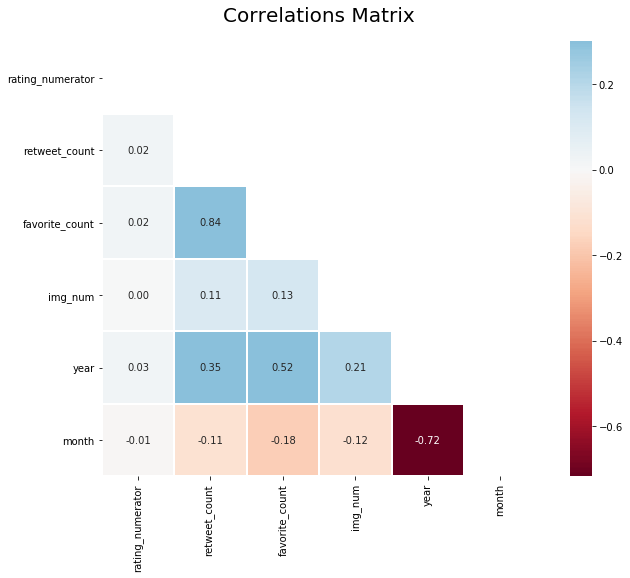

In [543]:
#correlation matrix in seaborn
# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as pltS
from matplotlib import style
corr=df_num.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize = (12,8))
sns.heatmap(corr, 
            annot=True,
            mask = mask,
            cmap = 'RdBu',
            linewidths=.9, 
            linecolor='white',
            vmax = 0.3,
            fmt='.2f',
            center = 0,
            square=True)
plt.title("Correlations Matrix", y = 1,fontsize = 20, pad = 20);

The rating of the dogs are not related to its retweet count or favorite count, suggesting most of the ratings are objective. However, retweet count and favorite count are highly correlated.

#### Insight 2
What are the most commonly seen features for top favorited tweets?

In [547]:
df_clean['dogs_stage'].value_counts()

pupper     215
doggo       73
puppo       23
floofer      8
Name: dogs_stage, dtype: int64

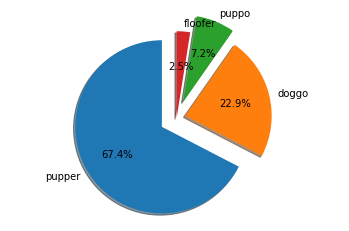

In [564]:

labels = df_clean[df_clean['dogs_stage'] != 'None']['dogs_stage'].value_counts().index.tolist()
labels
sizes =df_clean[df_clean['dogs_stage']!='None']['dogs_stage'].value_counts()
sizes
explode = (0.2, 0.1, 0.2, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [557]:
# create new dataframe by filter top 100 favorited counts 
high_rated = df_clean.nlargest(100,['retweet_count'])
print(high_rated.head(5))



                tweet_id                  timestamp  \
794   744234799360020481  2016-06-18 18:26:18+00:00   
2775  744234799360020481  2016-06-18 18:26:18+00:00   
4756  744234799360020481  2016-06-18 18:26:18+00:00   
6737  744234799360020481  2016-06-18 18:26:18+00:00   
826   739238157791694849  2016-06-04 23:31:25+00:00   

                                               source_x  \
794   <a href="http://twitter.com/download/iphone" r...   
2775  <a href="http://twitter.com/download/iphone" r...   
4756  <a href="http://twitter.com/download/iphone" r...   
6737  <a href="http://twitter.com/download/iphone" r...   
826   <a href="http://twitter.com/download/iphone" r...   

                                                 text_x  \
794   Here's a doggo realizing you can stand in a po...   
2775  Here's a doggo realizing you can stand in a po...   
4756  Here's a doggo realizing you can stand in a po...   
6737  Here's a doggo realizing you can stand in a po...   
826   Here's a dogg

In [558]:
print(high_rated.describe())

           tweet_id  rating_numerator  rating_denominator  retweet_count  \
count  1.000000e+02          100.0000               100.0      100.00000   
mean   8.049483e+17           12.6400                10.0    27378.04000   
std    6.551747e+16            1.0202                 0.0    14061.42389   
min    6.762197e+17           10.0000                10.0    16075.00000   
25%    7.613710e+17           12.0000                10.0    17320.00000   
50%    8.190153e+17           13.0000                10.0    23508.00000   
75%    8.620970e+17           13.0000                10.0    30594.00000   
max    8.907292e+17           14.0000                10.0    75695.00000   

       favorite_count     img_num         year      month      p_conf  
count      100.000000  100.000000   100.000000  100.00000  100.000000  
mean     59659.400000    1.360000  2016.440000    6.32000    0.416446  
std      41382.675747    0.745627     0.700937    3.52446    0.337922  
min          0.000000    1.

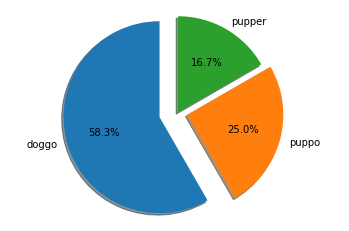

In [563]:
labels = high_rated[high_rated['dogs_stage'] != 'None']['dogs_stage'].value_counts().index.tolist()
labels
sizes = high_rated[high_rated['dogs_stage']!='None']['dogs_stage'].value_counts()
sizes
explode = (0.2, 0.1, 0, )  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [548]:
high_rated['p_dog'].value_counts()

golden_retriever            12
Labrador_retriever           8
French_bulldog               8
English_springer             4
toy_poodle                   4
Eskimo_dog                   4
Pomeranian                   4
Lakeland_terrier             4
cocker_spaniel               4
malamute                     4
Bedlington_terrier           4
chow                         4
whippet                      4
standard_poodle              4
Rottweiler                   4
Chesapeake_Bay_retriever     4
flat-coated_retriever        4
Name: p_dog, dtype: int64

Text(0.5, 1.0, 'Dogs from top favorited tweet counts')

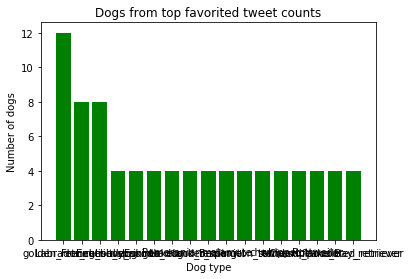

In [569]:
label=high_rated['p_dog'].value_counts().index.tolist()
value=high_rated['p_dog'].value_counts()


plt.bar(label, value, color='green')
plt.xlabel("Dog type")
plt.ylabel("Number of dogs")
plt.title("Dogs from top favorited tweet counts")

For the general dataset, pupper is the largest category with a percentage of 67.4. However, for the top favorited tweets, doggo is the largest category and thre is no floofer. The most popluar dog types are golden_retrievers.            

#### Insight 3
How many tweets were published each year？

In [570]:
df_clean['year'].value_counts()

2016    3856
2015    2604
2017    1464
Name: year, dtype: int64

Text(0.5, 1.0, 'Tweets published each year')

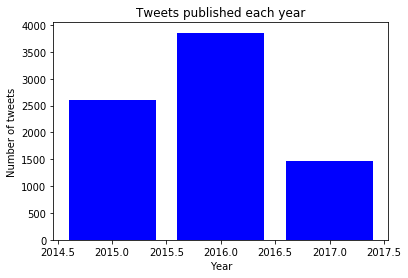

In [573]:
year_label=df_clean['year'].value_counts().index.tolist()
year_value=df_clean['year'].value_counts()


plt.bar(year_label, year_value, color='blue')
plt.xlabel("Year")
plt.ylabel("Number of tweets")
plt.title("Tweets published each year")

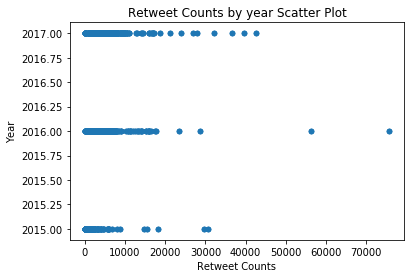

In [575]:
df_clean.plot(x='retweet_count', y='year', kind='scatter')
plt.xlabel('Retweet Counts')
plt.ylabel('Year')
plt.title('Retweet Counts by year Scatter Plot')
fig = plt.gcf()


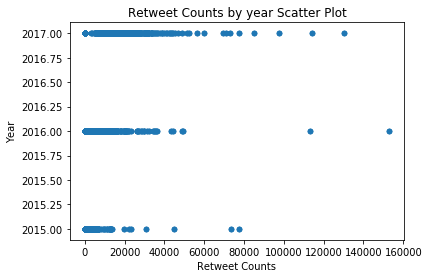

In [576]:
df_clean.plot(x='favorite_count', y='year', kind='scatter')
plt.xlabel('Retweet Counts')
plt.ylabel('Year')
plt.title('Retweet Counts by year Scatter Plot')
fig = plt.gcf()


Year 2016 is when most tweets are published and most tweets are favorited and retweeted.